### Unsupervised learning (Clustering)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Upload our datasets and process them:

In [2]:
dataset1 = pd.read_csv("data_2d.csv")
X1 = dataset1.iloc[:, :].values  # Select all rows and columns for the first dataset

In [3]:
dataset2 = pd.read_csv("mnist.csv")
X2 = dataset2.iloc[:, :].values  # Select all rows and columns for the second dataset

In [4]:
# Application of the k-means method for the first dataset
inertia_values_1 = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X1)
    inertia_values_1.append(kmeans.inertia_)

In [5]:
# Application of the k-means method for the second dataset
inertia_values_2 = []
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X2)
    inertia_values_2.append(kmeans.inertia_)

#### In order to find the optimal number of clusters, let's build graphs using the elbow method:

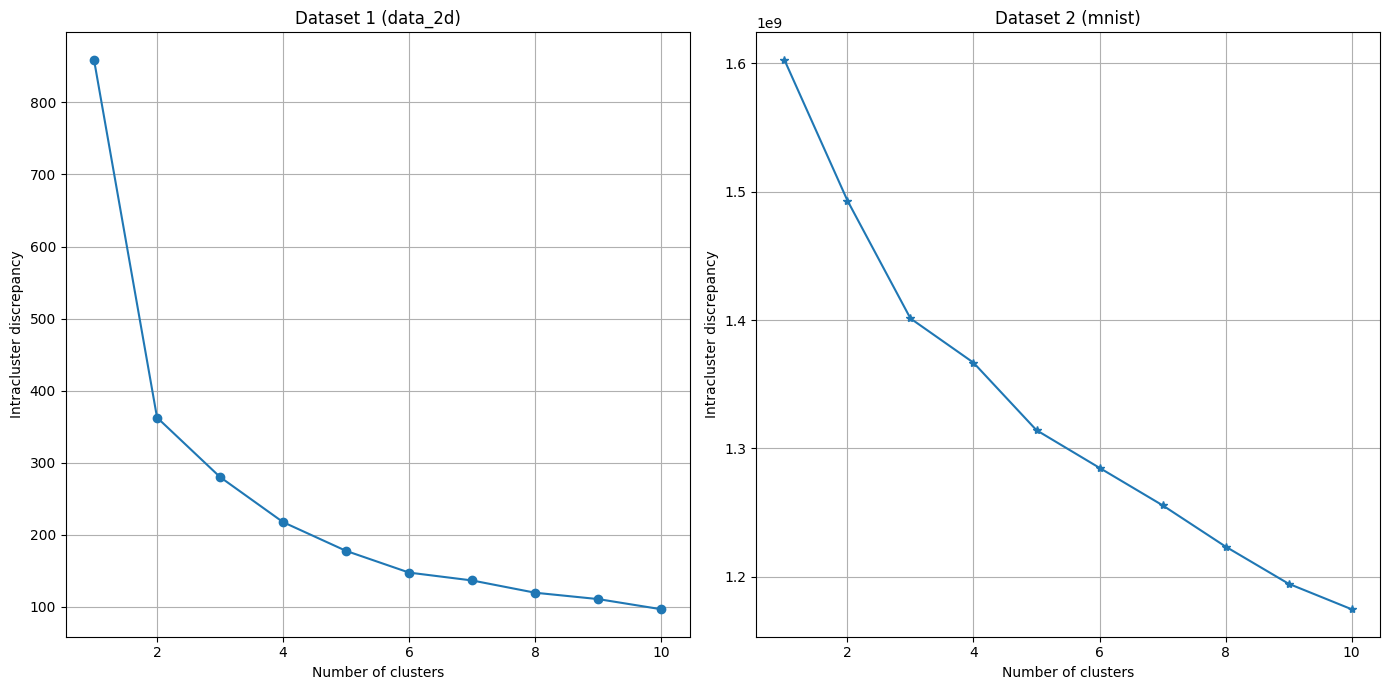

In [6]:
# Graphing for both datasets
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia_values_1, marker='o')
plt.title('Dataset 1 (data_2d)')
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster discrepancy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, max_clusters + 1), inertia_values_2, marker='*')
plt.title('Dataset 2 (mnist)')
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster discrepancy')

plt.tight_layout()
plt.grid()
plt.show()

#### The first graph of our dataset data_2d shows that the optimal number of clusters is: n_clusters=2

### Visualization of the work of clustering on the first dataset(data_2d):

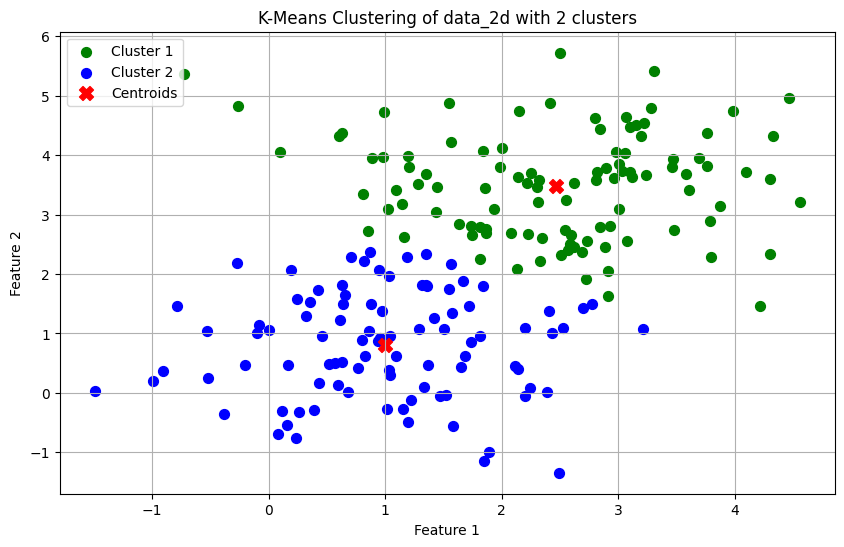

In [7]:
# Selecting data for clustering (ignoring the first column)
X_1 = dataset1.iloc[:, 1:]

optimal_clusters_data_2d = 2
# Application of K-means clustering with 2 clusters
kmeans_2d = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_2d = kmeans_2d.fit_predict(X_1)

# Visualization of clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_1.iloc[y_kmeans_2d == 0, 0], X_1.iloc[y_kmeans_2d == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_1.iloc[y_kmeans_2d == 1, 0], X_1.iloc[y_kmeans_2d == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering of data_2d with {optimal_clusters_data_2d} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### We will use the PCA method to reduce the dimension of the dataset mnist to 2:

In [8]:
dataset2.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.decomposition import PCA

# Selection of data for PCA (all columns except the first, which is a label)
mnist_data = dataset2.iloc[:, 1:]

# Applying PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist_data)

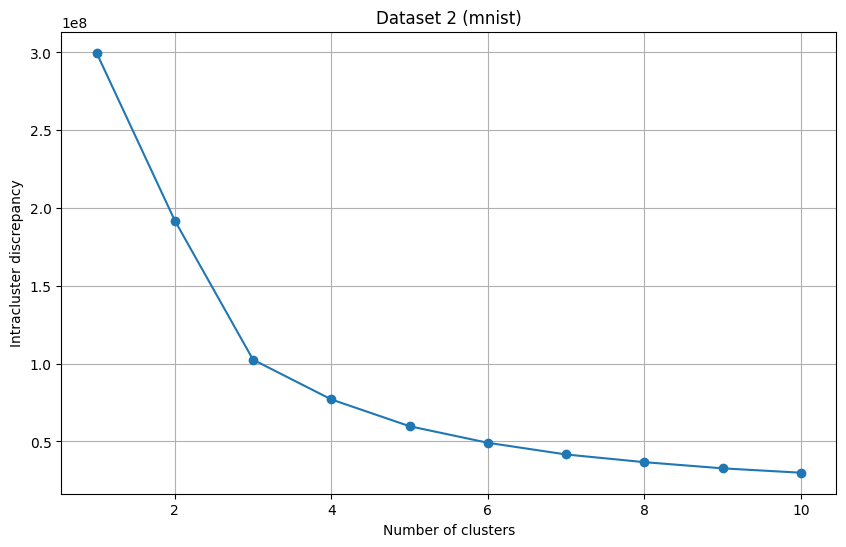

In [10]:
# Application of K-means clustering and determination of the optimal number of clusters
wcss_mnist = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_mnist.fit(mnist_2d)
    wcss_mnist.append(kmeans_mnist.inertia_)

# Visualization of the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_mnist, marker='o', linestyle='-')
plt.title('Dataset 2 (mnist)')
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster discrepancy')
plt.grid(True)
plt.show()

#### The graph of our dataset mnist shows that the optimal number of clusters is: n_clusters=3

### Visualization of the work of clustering on the second dataset(mnist):

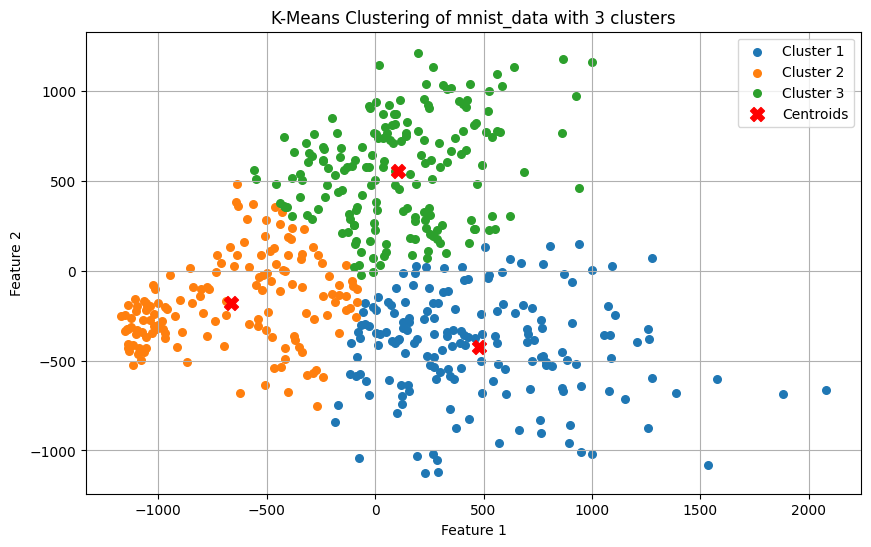

In [11]:
# Selection of the optimal number of clusters by the elbow method
optimal_clusters_mnist = 3

# Application of K-means clustering with the optimal number of clusters
kmeans_mnist_optimal = KMeans(n_clusters=optimal_clusters_mnist, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_mnist_optimal = kmeans_mnist_optimal.fit_predict(mnist_2d)

# Visualization of clustering results with the optimal number of clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_clusters_mnist):
    plt.scatter(mnist_2d[y_kmeans_mnist_optimal == cluster_label, 0],
                mnist_2d[y_kmeans_mnist_optimal == cluster_label, 1],
                s=30, label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_mnist_optimal.cluster_centers_[:, 0], kmeans_mnist_optimal.cluster_centers_[:, 1],
            s=100, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering of mnist_data with {optimal_clusters_mnist} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()